Group ID: Group 15 

Tyler Brannon - 100783157

Patrick Guerin - 100784247

Eric D'Souza -  100782796

Mohammadreza Rahbar - 100781952

In [1]:
import csv
import re
import pandas as pd
from functools import reduce
import numpy as np
import calendar
import string
import matplotlib.pyplot as plt
import seaborn as sns

def open_csv(file_name):
    collection = []
    with open(file_name, 'r') as f:
        for line in csv.DictReader(f):
            collection.append(line)
        return collection
    
students_math = open_csv('student-mat.csv')
students_por = open_csv('student-por.csv')

**Data Cleaning**

1.) combine both tables to make the data easier to work with

2.) parse any numbers represented as strings to ints (i.e., goout is represented as a string so we should parse it to a int)

3.) get rid of any unreadable data points (i.e., any NA values)

4.) drop any students that appear in both data sets (there is a note at the bottom of the dataset link to the dataset that explain how to determine how a student is in both datasets)

In [2]:
df_port = pd.DataFrame(students_por)
df_math = pd.DataFrame(students_math)
df_combine =  pd.concat([df_port,df_math])
df_combine = df_combine.reset_index()
considered = ["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"]
df_combine = df_combine.drop(labels = 'index', axis=1)
df_combine = df_combine.drop_duplicates(subset=considered,ignore_index = True)
df_combine

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,MS,F,19,U,LE3,T,3,2,services,services,...,3,2,2,1,1,3,4,7,7,9
658,MS,F,20,U,GT3,T,4,2,health,other,...,5,4,3,1,1,3,4,15,14,15
659,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
660,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7


In [3]:
df_combine['age'] = df_combine['age'].apply(pd.to_numeric)
df_combine['Medu'] = df_combine['Medu'].apply(pd.to_numeric)
df_combine['Fedu'] = df_combine['Fedu'].apply(pd.to_numeric)
df_combine['traveltime'] = df_combine['traveltime'].apply(pd.to_numeric)
df_combine['studytime'] = df_combine['studytime'].apply(pd.to_numeric)
df_combine['famrel'] = df_combine['famrel'].apply(pd.to_numeric)
df_combine['freetime'] = df_combine['freetime'].apply(pd.to_numeric)
df_combine['goout'] = df_combine['goout'].apply(pd.to_numeric)
df_combine['Dalc'] = df_combine['Dalc'].apply(pd.to_numeric)
df_combine['Walc'] = df_combine['Walc'].apply(pd.to_numeric)
df_combine['health'] = df_combine['health'].apply(pd.to_numeric)
df_combine['absences'] = df_combine['absences'].apply(pd.to_numeric)
df_combine['G1'] = df_combine['G1'].apply(pd.to_numeric)
df_combine['G2'] = df_combine['G2'].apply(pd.to_numeric)
df_combine['G3'] = df_combine['G3'].apply(pd.to_numeric)

In [4]:
df_combine= df_combine.dropna(how="any")

**Exploring The Data**

1.) What are the different columns and how many are there

2.) how do the students surveyed range in age

3.) how many math students were surveyed compared to portuguse students

4.) is there even distribution of male vs female students surveyed

5.) what are the different job categories in the table

6.) how many attend each students attend each school out of the students surveyed



In [5]:
print(df_combine.keys())
print('total columns: %d'%len(df_combine.keys()))

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')
total columns: 33


from this we can see that there are 33 different statistic tracked ignoring index column

In [6]:
print("Math Students Surveyed: %d"%len(df_math))
print("Portuguese Students Surveyed: %d"%len(df_port))

Math Students Surveyed: 395
Portuguese Students Surveyed: 649


From this we can see that more portugese language students surveyed compared to math students

F    390
M    272
Name: sex, dtype: int64

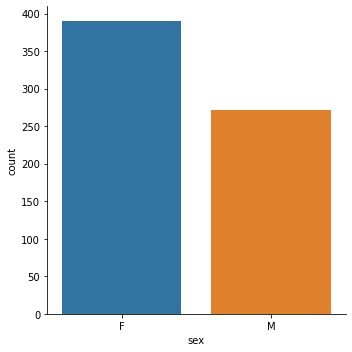

In [7]:
sns.catplot(data=df_combine,kind='count', x="sex")
df_combine['sex'].value_counts()

from this we can see that slightly more female students were surveyed than male students.

In [8]:
print("minimun age: %d"%df_combine['age'].min())
print("maximun age: %d"%df_combine['age'].max())
print("range:       %d"%(df_combine['age'].max()-df_combine['age'].min()))

minimun age: 15
maximun age: 22
range:       7


from this we can see that the youngest students surveyed were 15 and the oldest were 22 this gives us a range of 7

In [9]:
np.unique(df_combine[['Fjob','Mjob']])

array(['at_home', 'health', 'other', 'services', 'teacher'], dtype=object)

7.)If a student has at least one parent working their job from home, then are they more likely to drink alcohol? Take all the data of kids with at least one parent that works from home, and check if it's common for the kid to drink alcohol.

GP    434
MS    228
Name: school, dtype: int64

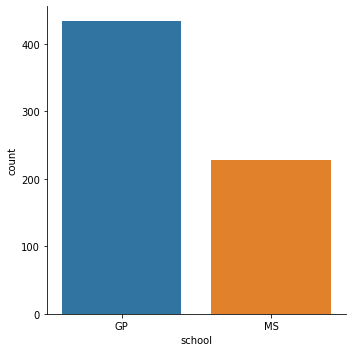

In [10]:
sns.catplot(data=df_combine,kind='count', x="school")
df_combine['school'].value_counts()

from the graph we can see that a moderate amount more students from GP then from MS that were surveyed

In [11]:
def is_at_home(x):
    if x == 'at_home':
        return True
    
    return False
def one_at_home(x,y):
    one = []
    for i in range(len(x)):
        if x[i] == 1 or y[i] ==1:
            one.append(1)
        else:
            one.append(0)
    return one 


M_at_home = df_combine['Mjob'].apply(is_at_home)
F_at_home = df_combine['Fjob'].apply(is_at_home)
o_at_home = one_at_home(M_at_home,F_at_home)


df_combine.insert(column='P_at_home',loc=33,value=o_at_home)
df_combine

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,P_at_home
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,0
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,MS,F,19,U,LE3,T,3,2,services,services,...,2,2,1,1,3,4,7,7,9,0
658,MS,F,20,U,GT3,T,4,2,health,other,...,4,3,1,1,3,4,15,14,15,0
659,MS,M,20,U,LE3,A,2,2,services,services,...,5,4,4,5,4,11,9,9,9,0
660,MS,M,21,R,GT3,T,1,1,other,other,...,5,3,3,3,3,3,10,8,7,0


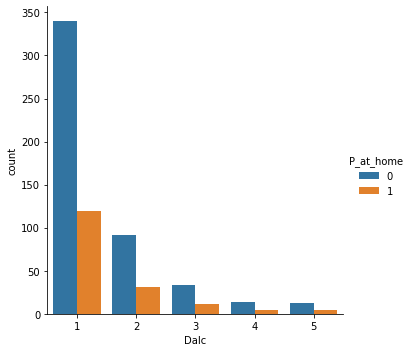

In [12]:
sns.catplot(data=df_combine,kind='count', x="Dalc", hue="P_at_home")


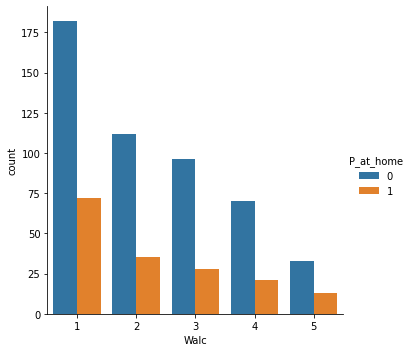

In [13]:
sns.catplot(data=df_combine,kind='count', x="Walc", hue="P_at_home")

From the 2 graphs above we can see that the amount of alcohol consumption consumed by students on weekdays and weekends follows relatively the same downward trend less students in each degree of the follows the same downward trend regardless of the of weather or not the student has one parent working from home.  